In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [216]:
df_train = pd.read_csv('data/train.csv') 
df_train.fillna(0, inplace=True)
df_train.drop(['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)
df_train.rename({'Pclass': 'Class'}, axis=1, inplace=True)
df_train['Survived'].replace([1], 'Yes', inplace=True)
df_train['Survived'].replace([0], 'No', inplace=True)
df_train

,Survived,Class,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,No,3,male,22.0,1,0,7.2500,0,S
1,Yes,1,female,38.0,1,0,71.2833,C85,C
2,Yes,3,female,26.0,0,0,7.9250,0,S
3,Yes,1,female,35.0,1,0,53.1000,C123,S
4,No,3,male,35.0,0,0,8.0500,0,S
...,...,...,...,...,...,...,...,...,...
886,No,2,male,27.0,0,0,13.0000,0,S
887,Yes,1,female,19.0,0,0,30.0000,B42,S
888,No,3,female,0.0,1,2,23.4500,0,S
889,Yes,1,male,26.0,0,0,30.0000,C148,C


In [217]:
p_total = df_train.shape[0]
p_survived = df_train[df_train['Survived']=='Yes'].count()[0]
p_died = p_total - p_survived

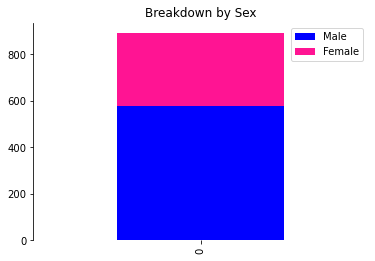

In [218]:
male = df_train.loc[df_train['Sex']=='male'].count()[1]
female = df_train.loc[df_train['Sex']=='female'].count()[1]
df_sexes = pd.DataFrame([[male, female]], columns=['Male', 'Female'])
plot = df_sexes.plot.bar(stacked=True, color=['blue', 'deeppink'])
plot.set_title('Breakdown by Sex')
plot.spines['bottom'].set_visible(False)
plot.spines['right'].set_visible(False)
plot.spines['top'].set_visible(False)

Text(0.5, 1.0, 'Total by Sex and Class')

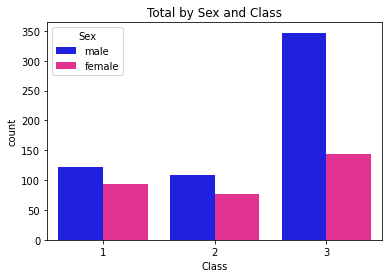

In [219]:
plot=sns.countplot(data=df_train, x='Class', hue='Sex', palette=['blue', 'deeppink'])
plot.set_title('Total by Sex and Class')

Text(0.5, 1.0, 'Total Survived by Sex and Class')

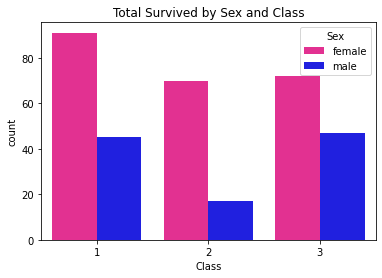

In [220]:
df_byclass=df_train[['Survived', 'Class', 'Sex']]
df_byclass=df_byclass[df_byclass['Survived']=='Yes']
plot=sns.countplot(data=df_byclass, x='Class', hue='Sex', palette=['deeppink', 'blue'])
plot.set_title('Total Survived by Sex and Class')

<AxesSubplot:>

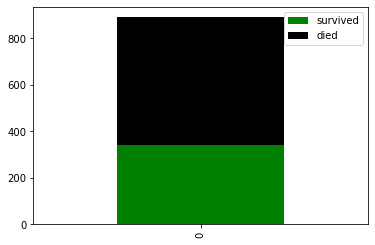

In [221]:
df_count = pd.DataFrame([[p_survived, p_died]], columns =['survived', 'died'])
df_count.plot.bar(stacked=True, color=['green', 'black'])

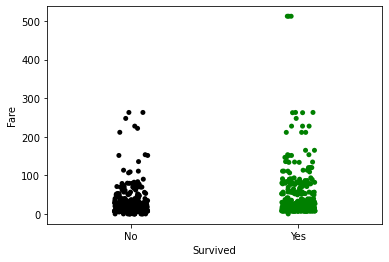

In [222]:
plot=sns.stripplot(data=df_train, x='Survived', y='Fare', palette=['black', 'green'])
plot.set_xlabel=['Yes', 'No']

<AxesSubplot:xlabel='Survived', ylabel='Age'>

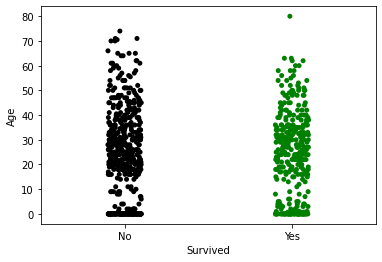

In [223]:
sns.stripplot(data=df_train, x='Survived', y='Age', palette=['black', 'green'])

Text(0.5, 1.0, 'Total Survived vs Perished by Class')

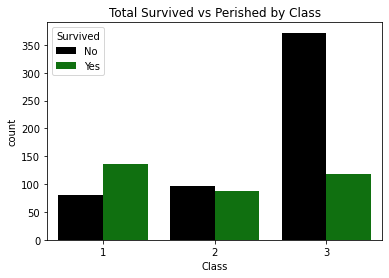

In [224]:
plot=sns.countplot(data=df_train, x='Class', hue='Survived', palette=['black', 'green'])
plot.set_title('Total Survived vs Perished by Class')

In [225]:
df_train

,Survived,Class,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,No,3,male,22.0,1,0,7.2500,0,S
1,Yes,1,female,38.0,1,0,71.2833,C85,C
2,Yes,3,female,26.0,0,0,7.9250,0,S
3,Yes,1,female,35.0,1,0,53.1000,C123,S
4,No,3,male,35.0,0,0,8.0500,0,S
...,...,...,...,...,...,...,...,...,...
886,No,2,male,27.0,0,0,13.0000,0,S
887,Yes,1,female,19.0,0,0,30.0000,B42,S
888,No,3,female,0.0,1,2,23.4500,0,S
889,Yes,1,male,26.0,0,0,30.0000,C148,C


# Model

In [226]:
def transform_dataframe(df_in, train=True):
    sex = LabelEncoder().fit(df_in['Sex']).transform(df_in['Sex'])
    df_out = df_in.copy()
    if train:
        survived = LabelEncoder().fit(df_in['Survived']).transform(df_in['Survived'])
        df_out['Survived'] = survived
    df_out.drop(['Cabin', 'Embarked'], axis=1, inplace=True)
    df_out['Sex']=[int(not(i)) for i in sex] # switching polarity has nothing to do with feminism, need it for proper correlation
    return df_out

In [227]:
df_train = transform_dataframe(df_train)

<AxesSubplot:>

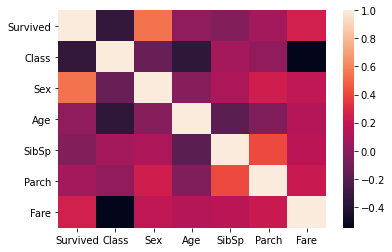

In [228]:
sns.heatmap(df_model.corr())

In [229]:
predictors=['Sex', 'Fare', 'Class']

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import plot_confusion_matrix

In [231]:
X = df_model[predictors]
y = df_model['Survived']

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [233]:
estimators = [ 
            ('kneighbors', KNeighborsClassifier() ),
            ('logreg', LogisticRegression() ),
            ('mlp', MLPClassifier() ),
            ('decistree', DecisionTreeClassifier() )
]

In [234]:
scores = []
for model in estimators:
    model[1].fit(X_train, y_train).predict(X_test)   
    print('{}: {}'.format(model[0], model[1].score(X_test, y_test)))

kneighbors: 0.7762711864406779
logreg: 0.7966101694915254
mlp: 0.7864406779661017
decistree: 0.8101694915254237


# Production

In [235]:
df_test = pd.read_csv('data/test.csv')
df_test.fillna(0, inplace=True)
df_test = transform_dataframe(df_test, train=False)

In [236]:
predictors = ['Sex','Fare', 'Pclass']
model = DecisionTreeClassifier().fit(X, y)
yhat = model.predict(df_test[predictors])

In [237]:
df_prod = df_test[['PassengerId']]
df_prod['Survived'] = yhat

<ipython-input-237-88f3031be06b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prod['Survived'] = yhat


In [238]:
df_prod.to_csv('submission.csv', index=False)